In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Categorical data
1. if the comtains a finite number of distincts group(or categories)
2. The categories are usually fixed or known
3. Known as qualitative data

# Numerical Data
1. Known as quantitative data
2. Expressed using a numerical value
3. Is usually a measurement(height, weight, IQ, etc)

# Categorical data can be further broken down into two categories such as
1. Ordinal

categorical variables that have a natural order such as survey data
1. strongly disagree - 1
2. Disagree - 2
3. Neutral - 3
4. Agree - 4
5. Strongly agree- 5




2. Nominal

  Categorical variables that can not be placed into a natural order. Ex- when a survey ask what is your favorite color?

Blue, Green, Red, Yellow, Purple


# The adult census dataset cotains information whether or not an adult makes over 50,000$ annually.

In [6]:
adult = pd.read_csv('/Users/mishudhar/Downloads/Categorcal_Python/adult.csv')
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Workclass        32561 non-null  object
 2   fnlgwt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education Num    32561 non-null  int64 
 5   Marital Status   32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital Gain     32561 non-null  int64 
 11  Capital Loss     32561 non-null  int64 
 12  Hours/Week       32561 non-null  int64 
 13  Country          32561 non-null  object
 14  Above/Below 50k  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


When the datatype is object that is good indicator od categorical data. Let's have a look on 'Marital Status' column;

In [9]:
adult['Marital Status'].describe()

count                   32561
unique                      7
top        Married-civ-spouse
freq                    14976
Name: Marital Status, dtype: object

In [10]:
adult['Marital Status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital Status, dtype: int64

In [11]:
adult['Marital Status'].value_counts(normalize = True)

 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name: Marital Status, dtype: float64

In [13]:
print(adult['Above/Below 50k'].value_counts())

 <=50K    24720
 >50K      7841
Name: Above/Below 50k, dtype: int64


In [14]:
# Relative frequency
print(adult['Above/Below 50k'].value_counts(normalize = True))

 <=50K    0.75919
 >50K     0.24081
Name: Above/Below 50k, dtype: float64


In [15]:
# convering object to categorical data
adult['Marital Status'] = adult['Marital Status'].astype('category')

In [16]:
adult['Marital Status'].dtypes

CategoricalDtype(categories=[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
                  ' Married-spouse-absent', ' Never-married', ' Separated',
                  ' Widowed'],
, ordered=False)

In [20]:
medals_won = ['Gold', 'Bronze', 'Silver', 'Gold', 'Bronze']
medal = pd.Categorical(medals_won, categories = ['Bronze', 'Silver', 'Gold'], ordered = True)
medal

['Gold', 'Bronze', 'Silver', 'Gold', 'Bronze']
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']

In [22]:
# Create a dictionary with column names as keys and "category" as values
adult_dtypes = {'Workclass': 'category', 'Education': 'category',
                'Relationship': 'category', 'Above/Below 50k': 'category'}

In [24]:
adult_2 = pd.read_csv('/Users/mishudhar/Downloads/Categorcal_Python/adult.csv', dtype = adult_dtypes)
adult_2.dtypes

Age                   int64
Workclass          category
fnlgwt                int64
Education          category
Education Num         int64
Marital Status       object
Occupation           object
Relationship       category
Race                 object
Sex                  object
Capital Gain          int64
Capital Loss          int64
Hours/Week            int64
Country              object
Above/Below 50k    category
dtype: object

# Group BY

In [25]:
adult1 = adult_2[adult_2['Above/Below 50k'] == " <=50k"]
adult2 = adult_2[adult_2['Above/Below 50k'] == ' >50k']

This can be replace by using a oneliner

In [29]:
groupby_object = adult_2.groupby('Above/Below 50k')
groupby_object.mean()

,Age,fnlgwt,Education Num,Capital Gain,Capital Loss,Hours/Week
Above/Below 50k,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


In [30]:
adult_2.groupby('Above/Below 50k').mean()

,Age,fnlgwt,Education Num,Capital Gain,Capital Loss,Hours/Week
Above/Below 50k,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


# Specifying columns

In [33]:
adult_2.groupby('Above/Below 50k')[['Age', 'Education Num']].sum()

,Age,Education Num
Above/Below 50k,,
<=50K,909294,237190
>50K,346963,91047


In [32]:
# we will get the same result 
adult_2.groupby('Above/Below 50k').sum()[['Age', 'Education Num']]

,Age,Education Num
Above/Below 50k,,
<=50K,909294,237190
>50K,346963,91047


# Groupby By multiple columns

In [35]:
adult_2.groupby(by = ['Above/Below 50k', 'Marital Status']).size()

Above/Below 50k  Marital Status        
 <=50K            Divorced                  3980
                  Married-AF-spouse           13
                  Married-civ-spouse        8284
                  Married-spouse-absent      384
                  Never-married            10192
                  Separated                  959
                  Widowed                    908
 >50K             Divorced                   463
                  Married-AF-spouse           10
                  Married-civ-spouse        6692
                  Married-spouse-absent       34
                  Never-married              491
                  Separated                   66
                  Widowed                     85
dtype: int64

In [42]:
adult.groupby(by=[ "Workclass","Above/Below 50k", "Education"]).size()

Workclass     Above/Below 50k  Education    
 ?             <=50K            10th             98
                                11th            118
                                12th             38
                                1st-4th          12
                                5th-6th          28
                                               ... 
 State-gov     >50K             Some-college     31
 Without-pay   <=50K            7th-8th           1
                                Assoc-acdm        1
                                HS-grad           9
                                Some-college      3
Length: 208, dtype: int64

In [43]:
# Group the adult dataset by "Sex" and "Above/Below 50k"
gb = adult.groupby(by = ['Sex', 'Above/Below 50k']).size()

# Print out how many rows are in each created group
print(gb)

# Print out the mean of each group for all columns
print(gb.mean())

Sex      Above/Below 50k
 Female   <=50K              9592
          >50K               1179
 Male     <=50K             15128
          >50K               6662
dtype: int64
8140.25


In [44]:
# Create a list of user-selected variables
user_list = ['Education', 'Above/Below 50k']

# Create a GroupBy object using this list
gb = adult.groupby(by = user_list)

# Find the mean for the variable "Hours/Week" for each group - Be efficient!
print(gb['Hours/Week'].mean())

Education      Above/Below 50k
 10th           <=50K             36.574053
                >50K              43.774194
 11th           <=50K             33.322870
                >50K              45.133333
 12th           <=50K             35.035000
                >50K              44.818182
 1st-4th        <=50K             37.864198
                >50K              48.833333
 5th-6th        <=50K             38.539432
                >50K              46.000000
 7th-8th        <=50K             38.830033
                >50K              47.500000
 9th            <=50K             37.667351
                >50K              44.851852
 Assoc-acdm     <=50K             39.264339
                >50K              44.256604
 Assoc-voc      <=50K             40.817826
                >50K              43.853186
 Bachelors      <=50K             40.586152
                >50K              45.475462
 Doctorate      <=50K             45.429907
                >50K              47.513072
 

# Set, Add and Remove Category

In [45]:
dogs = pd.read_csv('/Users/mishudhar/Downloads/Categorcal_Python/ShelterDogs.csv')
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2937 entries, 0 to 2936
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2937 non-null   int64  
 1   name               2845 non-null   object 
 2   age                2937 non-null   float64
 3   sex                2937 non-null   object 
 4   breed              2937 non-null   object 
 5   date_found         2937 non-null   object 
 6   adoptable_from     2937 non-null   object 
 7   posted             2937 non-null   object 
 8   color              2937 non-null   object 
 9   coat               2937 non-null   object 
 10  size               2937 non-null   object 
 11  neutered           1852 non-null   object 
 12  housebroken        460 non-null    object 
 13  likes_people       1999 non-null   object 
 14  likes_children     1219 non-null   object 
 15  get_along_males    1633 non-null   object 
 16  get_along_females  1673 

In [47]:
# converting coat column into category
dogs['coat'] = dogs['coat'].astype('category')
dogs['coat'].value_counts()

short         1972
medium         565
wirehaired     220
long           180
Name: coat, dtype: int64

In [48]:
dogs['coat'].value_counts(dropna = False)

short         1972
medium         565
wirehaired     220
long           180
Name: coat, dtype: int64

# The.cat accessor object
Series.cat.method_name
1. new_categories: a list of new categories
2. inplace: Boolean. whether or not the update should overwrite the series
3. ordered: Boolean: - whetether or not the categorical is treated as an ordered categorical

In [49]:
dogs['coat'] = dogs['coat'].cat.set_categories(new_categories = ['short', 'medium', 'long'])

In [50]:
dogs['coat'].value_counts(dropna = False)

short     1972
medium     565
NaN        220
long       180
Name: coat, dtype: int64

Notice that the 'wirehaired' category has been dropped as it is not listed in the new_categories and replaced by NAN

In [51]:
dogs['coat'].value_counts()

short     1972
medium     565
long       180
Name: coat, dtype: int64

In [52]:
# We can set the ordered pf the category by using ordered = True parameter
dogs['coat'] = dogs['coat'].cat.set_categories(new_categories = ['short', 'medium', 'long'],
                                              ordered = True)

In [53]:
dogs['coat'].head()

0     short
1     short
2     short
3    medium
4     short
Name: coat, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

In [55]:
dogs['likes_people'].value_counts(dropna = False)

yes    1991
NaN     938
no        8
Name: likes_people, dtype: int64

In this column there are 938 rows without a response. Maybe the dod shelter did not check or they did checked but did not record the data.

Let's add a couple of categories to clean this up

In [68]:
dogs_df = pd.read_csv('/Users/mishudhar/Downloads/Categorcal_Python/ShelterDogs.csv')

# Convert likes_people into category type
dogs_df['likes_people'] = dogs['likes_people'].astype('category')

# Check the categories
dogs_df['likes_people'].cat.categories

Index(['did not check', 'could not tell'], dtype='object')

In [69]:
# Adding new categories
dogs_df['likes_people'] = dogs_df['likes_people'].cat\
                       .add_categories(new_categories = ['no', 'yes'])

In [70]:
dogs_df['likes_people'].cat.categories

Index(['did not check', 'could not tell', 'no', 'yes'], dtype='object')

In [71]:
dogs_df['likes_people'].value_counts(dropna = False)

NaN               2937
did not check        0
could not tell       0
no                   0
yes                  0
Name: likes_people, dtype: int64

In [73]:
dogs_a = pd.read_csv('/Users/mishudhar/Downloads/Categorcal_Python/ShelterDogs.csv')
dogs_a.dtypes

ID                     int64
name                  object
age                  float64
sex                   object
breed                 object
date_found            object
adoptable_from        object
posted                object
color                 object
coat                  object
size                  object
neutered              object
housebroken           object
likes_people          object
likes_children        object
get_along_males       object
get_along_females     object
get_along_cats        object
keep_in               object
dtype: object

# Removing categories

In [79]:
# Removing Categories
dogs['coat'] = dogs['coat'].cat.remove_categories(removals = ['medium'])



In [77]:
dogs['coat'].cat.categories

Index(['medium', 'long'], dtype='object')

In [80]:
dogs_a['coat'].value_counts(dropna= False)

short         1972
medium         565
wirehaired     220
long           180
Name: coat, dtype: int64

The owner of a local dog adoption agency has listings for almost 3,000 dogs. One of the most common questions they have been receiving lately is: "What type of area was the dog previously kept in?". We are setting up a pipeline to do some analysis and want to look into what information is available regarding the "keep_in" variable. Both pandas, as pd, and the dogs dataset have been preloaded.

In [81]:
dogs_a['keep_in'].value_counts(dropna = False)

both flat and garden    1224
NaN                     1021
garden                   510
flat                     182
Name: keep_in, dtype: int64

In [82]:
dogs_a['keep_in'] = dogs_a['keep_in'].astype('category')

In [83]:
# Add new categories
new_categories = ["Unknown History", "Open Yard (Countryside)"]
dogs_a["keep_in"] = dogs_a["keep_in"].cat.add_categories(new_categories)

In [85]:
# Check frequency counts while also printing the NaN count
print(dogs_a["keep_in"].value_counts(dropna=False))

both flat and garden       1224
NaN                        1021
garden                      510
flat                        182
Unknown History               0
Open Yard (Countryside)       0
Name: keep_in, dtype: int64


In [87]:
dogs_a['likes_children'].value_counts(dropna = False)

NaN    1718
yes    1172
no       47
Name: likes_children, dtype: int64

 The owner of the data wants to convert all "maybe" responses to "no", as it would be unsafe to let a family adapt a dog if it doesn't like children. The code to convert all "maybe" to "no" is provided in Step 1. However, the option for "maybe" still remains as a category.

In [89]:
dogs_a['like_children'] = dogs_a['likes_children'].fillna('maybe', inplace = True)
dogs_a['likes_children'].value_counts(dropna = False)

maybe    1718
yes      1172
no         47
Name: likes_children, dtype: int64

In [91]:
# Set "maybe" to be "no"
dogs.loc[dogs["likes_children"] == "maybe", "likes_children"] = "no"

dogs['likes_children'].value_counts(dropna = False)

NaN    1718
yes    1172
no       47
Name: likes_children, dtype: int64

In [92]:
# Set "maybe" to be "no"
dogs_a.loc[dogs_a["likes_children"] == "maybe", "likes_children"] = "no"

dogs_a['likes_children'].value_counts(dropna = False)

no     1765
yes    1172
Name: likes_children, dtype: int64

In [ ]:
# Remove maybe from categories
# dogs['like_children'] = dogs['like_children'].cat.remove_categories('maybe')

# Renaming Categories
# Updating Categories

In [93]:
dogs_a['breed'] = dogs['breed'].astype('category')
dogs['breed'].value_counts(dropna = False)

Unknown Mix                                             1524
German Shepherd Dog Mix                                  190
Dachshund Mix                                            147
Labrador Retriever Mix                                    83
Staffordshire Terrier Mix                                 62
                                                        ... 
Border Collie, Spaniel Mix                                 1
Bull Terrier, Fox Terrier, Staffordshire Terrier Mix       1
Greyhound, Transylvanian Hound Mix                         1
Komondor Mix                                               1
German Pointer, Greyhound, Pointer Mix                     1
Name: breed, Length: 277, dtype: int64

The most common category is Unknown Mix. We can rename this by using dictionary.

Series.cat.rename_categories(new_caregories = dict)

In [97]:
my_changes = {'Unknown Mix': 'Unknown'}
dogs_a['breed'] = dogs_a['breed'].cat.rename_categories(my_changes)
dogs_a['breed'].value_counts()

Unknown                                     1524
German Shepherd Dog Mix                      190
Dachshund Mix                                147
Labrador Retriever Mix                        83
Staffordshire Terrier Mix                     62
                                            ... 
English Cocker Spaniel, Vizsla Mix             1
English Greyhound Mix                          1
English Greyhound, Spanish Greyhound Mix       1
Fox Terrier, German Shepherd Dog Mix           1
Yorkshire Terrier                              1
Name: breed, Length: 277, dtype: int64

In [99]:
dogs['sex'].value_counts()

male      1681
female    1256
Name: sex, dtype: int64

In [106]:
dogs_a['sex'] = dogs_a['sex'].astype('category')

dogs_a['sex'].cat.rename_categories(lambda c: c.title())
dogs_a['sex'].cat.categories

Index(['female', 'male'], dtype='object')

In [108]:
dogs_a['breed'].unique()

['Unknown', 'French Bulldog Mix', 'Vizsla Mix', 'Bull Terrier, Dachshund Mix', 'Kuvasz', ..., 'Bullmastiff Mix', 'German Dog, Labrador Retriever Mix', 'English Bloodhound, German Shepherd Dog Mix', 'German Pointer, Pointer Mix', 'German Pointer, Greyhound, Pointer Mix']
Length: 277
Categories (277, object): ['Adoptable From:', 'Afghan Hound', 'Akita', 'Akita Mix', ..., 'Welsh Terrier Mix', 'West Highland White Terrier Mix', 'Whippet Mix', 'Yorkshire Terrier']

# Collapsing Categories

In [109]:
dogs['color'] = dogs['color'].astype('category')

In [110]:
dogs['color'].cat.categories

Index(['apricot', 'black', 'black and brown', 'black and tan',
       'black and white', 'brown', 'brown and white', 'dotted', 'golden',
       'gray', 'gray and black', 'gray and white', 'red', 'red and white',
       'sable', 'saddle back', 'spotty', 'striped', 'tricolor', 'white',
       'wild boar', 'yellow', 'yellow-brown'],
      dtype='object')

There are a lot of mixed color or color combination. It must make sense to make a primary color, instead of color combination.

In [111]:
update_colors = {'black and brown': 'black',
                'black and tan': 'black',
                'black and white': 'black'}

In [113]:
# Use .replace method
dogs['main_color'] = dogs['color'].replace(update_colors)

In [114]:
dogs['main_color'].dtype

CategoricalDtype(categories=['apricot', 'black', 'brown', 'brown and white', 'dotted',
                  'golden', 'gray', 'gray and black', 'gray and white', 'red',
                  'red and white', 'sable', 'saddle back', 'spotty', 'striped',
                  'tricolor', 'white', 'wild boar', 'yellow', 'yellow-brown'],
, ordered=False)

In [124]:
dogs['likes_children'].value_counts(dropna = False)

NaN    1718
yes    1172
no       47
Name: likes_children, dtype: int64

In [129]:
dogs_d = pd.read_csv('/Users/mishudhar/Downloads/Categorcal_Python/ShelterDogs.csv')
dogs_d['likes_children'] = dogs_d['likes_children'].astype('category')

In [131]:
dogs_d['likes_children'].value_counts(dropna = False)

NaN    1718
yes    1172
no       47
Name: likes_children, dtype: int64

In [135]:
new_cat = {'NaN': 'Maybe?'}
dogs_d['likes_children'] = dogs_d['likes_children'].cat.rename_categories(new_cat)
dogs_d['likes_children'].value_counts()

yes    1172
no       47
Name: likes_children, dtype: int64

In [137]:
dogs_d['coat'].value_counts(dropna = False)

short         1972
medium         565
wirehaired     220
long           180
Name: coat, dtype: int64

In [138]:
dogs_d['coat'].dtype

dtype('O')

Collapsing Categories 

In [139]:
# Create the update_coats dictionary
update_coats = {'wirehaired': 'medium',
'long': 'medium'}

# Create a new column, coat_collapsed
dogs_d["coat_collapsed"] = dogs_d["coat"].replace(update_coats)

# Convert the column to categorical
dogs_d['coat_collapsed'].astype('category')

# Print the frequency table
print(dogs_d['coat_collapsed'].value_counts(dropna = False))

short     1972
medium     965
Name: coat_collapsed, dtype: int64


# Reordering categories
Why reordering categories
1. To create ordinal variables
2. Better for visualisation


In [141]:
dogs_df['coat'].value_counts(dropna = False)

short         1972
medium         565
wirehaired     220
long           180
Name: coat, dtype: int64

In [146]:
# Reordering Categories
# Step-1 crteate a category list
new_cat = ['Short', 'medium', 'long', 'wirehaired']

# Step-2 input it

#dogs_df['coat'] = dogs_df['coat'].cat.reorder_categories(new_cat, ordered = True)

In [150]:
dogs['size'] = dogs['size'].astype('category')
dogs['size'].cat.categories

Index(['large', 'medium', 'small'], dtype='object')

In [154]:
# Reorder the categories using the list provided
dogs["size"] = dogs["size"].cat.reorder_categories(new_categories=["small", "medium", "large"], ordered = True)

In [156]:
# How many Male/Female dogs are available of each size?
print(dogs.groupby(by = ['size'])['sex'].value_counts())



size    sex   
small   male       260
        female     214
medium  male      1090
        female     854
large   male       331
        female     188
Name: sex, dtype: int64


In [157]:
# Do larger dogs need more room to roam?
print(dogs.groupby(by = ['size'])['keep_in'].value_counts())

size    keep_in             
small   both flat and garden    238
        flat                     80
        garden                   21
medium  both flat and garden    795
        garden                  317
        flat                     97
large   both flat and garden    191
        garden                  172
        flat                      5
Name: keep_in, dtype: int64


# Cleaning and Accessing data

# Possible issuse with categorical Data
1. Inconssitent values: 'Ham', 'ham', 'Ham'
2. Misspelled values: 'Ham', 'Hma'
3. Finally, we need to make sure that if we make corrections after that our data remains catgorical not object

Identifying issues

In [158]:
dogs['get_along_cats'].value_counts(dropna = False)

NaN    2506
yes     275
no      156
Name: get_along_cats, dtype: int64

In [ ]:
# Fixing whitespace
#dogs['get_along_cats'] = dogs['get_along_cats'].str.strip()

# fixing capitalization
#dogs['get_along_cats'] = dogs['get_along_cats'].str.title()

# fixing misspelled
#replace_map = {'Noo':'No'}
#dogs['get_along_cats'] = dogs['get_along_cats'].replace(replace_map, inplace = True)

# Searching for a string
# dogs['breed'].str.contains('Shepherd', regex = False)

In [ ]:
# dogs.loc[dogs['get_along_cats'] == 'Yes', 'size']

# dogs.loc[dogs['get_along_cats'] == 'Yes', 'size'].value_counts(sort = False)

In [165]:
dogs.columns

Index(['ID', 'name', 'age', 'sex', 'breed', 'date_found', 'adoptable_from',
       'posted', 'color', 'coat', 'size', 'neutered', 'housebroken',
       'likes_people', 'likes_children', 'get_along_males',
       'get_along_females', 'get_along_cats', 'keep_in', 'main_color'],
      dtype='object')

In [168]:
dogs.head()

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in,main_color
0,23807,Gida,0.25,None,Unknown Mix,12/10/19,12/11/19,12/11/19,red,NaN,small,no,NaN,NaN,None,NaN,NaN,NaN,NaN,red
1,533,Frida És Ricsi,0.17,None,Unknown Mix,12/1/19,12/1/19,12/9/19,black,NaN,small,no,NaN,NaN,None,yes,yes,yes,NaN,black
2,23793,NaN,4.00,None,Unknown Mix,12/8/19,12/23/19,12/8/19,saddle back,NaN,medium,no,NaN,NaN,None,NaN,NaN,NaN,NaN,saddle back
3,23795,NaN,1.00,None,Unknown Mix,12/8/19,12/23/19,12/8/19,yellow-brown,NaN,medium,no,NaN,NaN,None,NaN,NaN,NaN,NaN,yellow-brown
4,23806,Amy,2.00,None,French Bulldog Mix,12/10/19,12/11/19,12/11/19,black,NaN,small,no,NaN,NaN,None,NaN,NaN,NaN,NaN,black


In [169]:
dogs.loc[dogs['get_along_cats'] == 'Yes', 'size']

Series([], Name: size, dtype: category
Categories (3, object): ['small' < 'medium' < 'large'])

In [172]:
dogs_d['coat'].value_counts(dropna = False)

short         1972
medium         565
wirehaired     220
long           180
Name: coat, dtype: int64

In [175]:
dogs_d.loc[dogs_d['coat'] == 'long', 'sex'].value_counts()

male      124
female     56
Name: sex, dtype: int64

In [177]:
# Print the mean age of dogs with a breed of "English Cocker Spaniel"
print(dogs.loc[dogs['breed'] == 'English Cocker Spaniel', 'age'].mean())

8.186153846153847


In [173]:
dogs_d['coat'].value_counts()

short         1972
medium         565
wirehaired     220
long           180
Name: coat, dtype: int64

In [178]:
# Count the number of dogs that have "English" in their breed name
print(dogs[dogs["breed"].str.contains("English", regex=False)].shape[0])


35


# Categorical Plot visualisation
Las Vegas Trip Advisor Reviews Dataset

In [182]:
reviews = pd.read_csv('/Users/mishudhar/Downloads/Categorcal_Python/lasvegas_tripadvisor.csv')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    int64 
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

In [183]:
reviews.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [186]:
reviews['Score'].value_counts()

5    227
4    164
3     72
2     30
1     11
Name: Score, dtype: int64

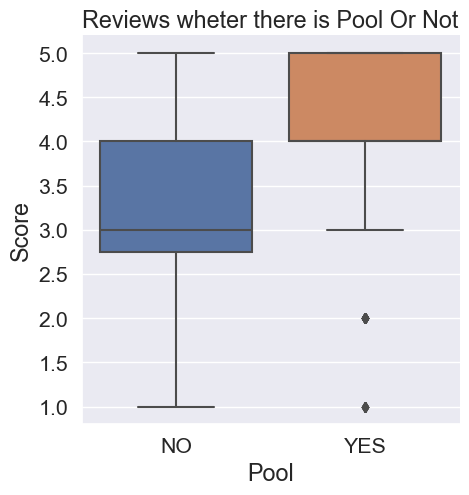

In [192]:
sns.catplot(data = reviews, x = 'Pool', y = 'Score', kind = 'box')
plt.title('Reviews wheter there is Pool Or Not')
sns.set(font_scale = 1.4)
sns.set_style('whitegrid')
plt.show()

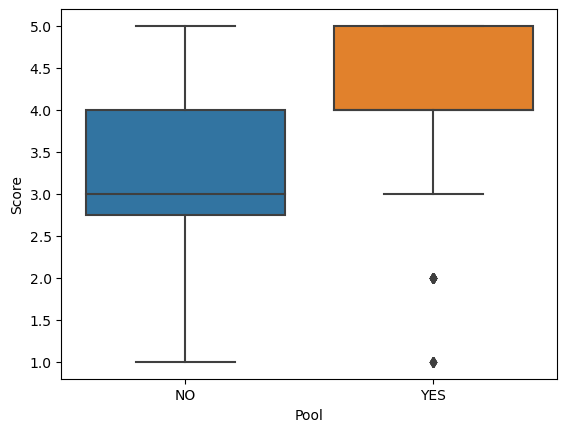

In [190]:
sns.boxplot(data = reviews, x= 'Pool', y = 'Score')
plt.show()

When people leave reviews for products, services, or destinations, people reading those reviews can sometimes mark the original review as helpful. If enough people mark the review as helpful, future readers of these reviews might be more likely to trust the content of the original review.

Using the reviews dataset, explore the continuous variable "Helpful votes" across the different categories found in the "Traveler type" variable.

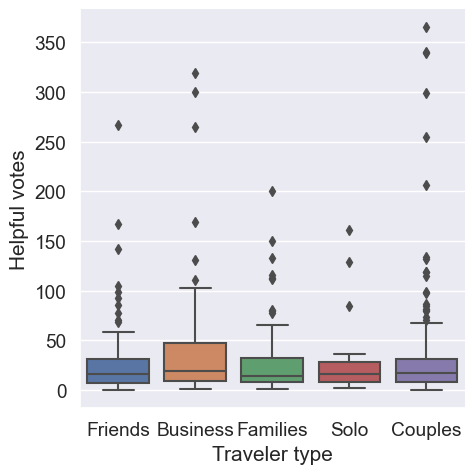

In [199]:
# Set the font size to 1.25
sns.set(font_scale = 1.25)

# Set the background to "darkgrid"
sns.set_style('darkgrid')

# Create a boxplot
sns.catplot(data = reviews, x = 'Traveler type', y = 'Helpful votes', kind = 'box')

plt.show()

It looks like Business Travelers have left most helpful reviews. There are fiew reviews by couples that alos might be helpfult to others.

# Barplot
# Summarize a numerical variable across Categorical variables

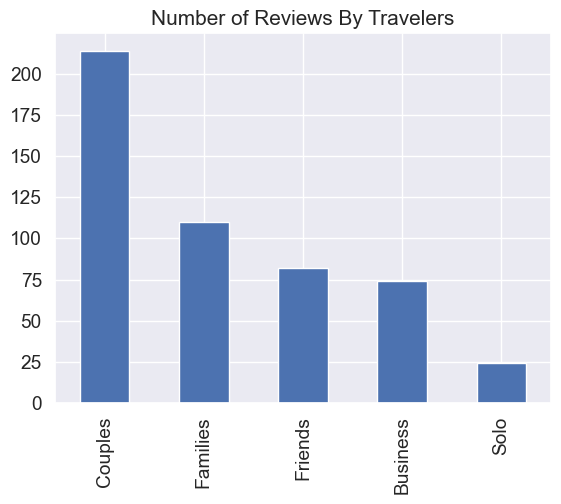

In [203]:
reviews['Traveler type'].value_counts().plot(kind = 'bar')
plt.title('Number of Reviews By Travelers')
plt.show()

import plotly.express as px
fig = px.histogram(reviews, x = 'Traveler type', color = 'Traveler type')
fig.show()

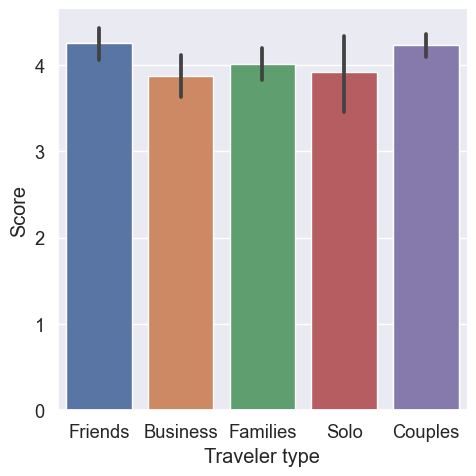

In [211]:
sns.set(font_scale = 1.2)
sns.set_style('darkgrid')
sns.catplot(data = reviews, x = 'Traveler type', y = 'Score', kind = 'bar')
plt.show()

If we look at the distribution od the score among those traveler type of friends, the estimated mean of this data would be just above 4 and the confidence interval would be quite small. While the solo mean is below 4 and the confidence interval is larger.

Sometimes visualizingbthe data across one variable is not enough. The 'Hue' parameter can be very helful in that case.

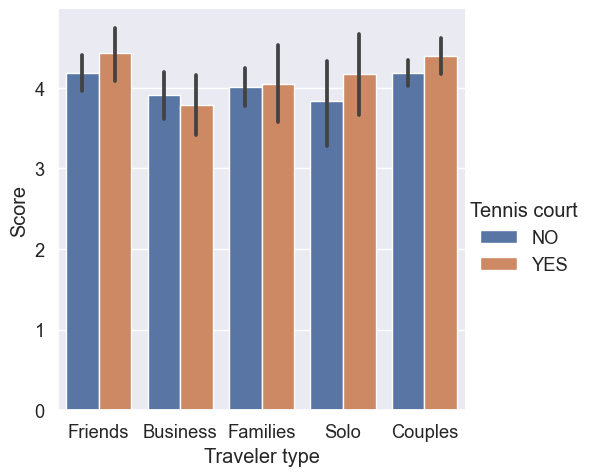

In [214]:
sns.set(font_scale = 1.2)
sns.set_style('darkgrid')
sns.catplot(data = reviews, x = 'Traveler type', y = 'Score', hue = 'Tennis court', kind = 'bar')
plt.show()

Except the business traveler all of the other types have given high score when there is a tennis court in the hotel.

Las Vegas hotels are seeing large variations in how helpful reviews appear to other people. The owners of these hotels are curious if there are times of the year when reviews have been more helpful to their potential guests. Help the owners understand their reviews better by creating a bar plot of the average number of helpful votes per review across the categorical variable "Period of stay"

Mar-May    128
Jun-Aug    126
Sep-Nov    126
Dec-Feb    124
Name: Period of stay, dtype: int64


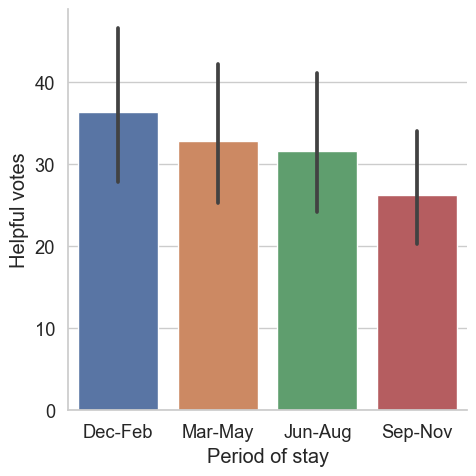

In [216]:
# Print the frequency counts of "Period of stay"
print(reviews["Period of stay"].value_counts())

sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# Create a bar plot of "Helpful votes" by "Period of stay"
sns.catplot(data = reviews, x = "Period of stay", y = "Helpful votes", kind = 'bar')
plt.show()

If we look at the numbers, most of the values are almost similar.

It looks like potential guest might get reviews from 'Dec-Feb' more helpful and 'Sep-Nov' less helpful.

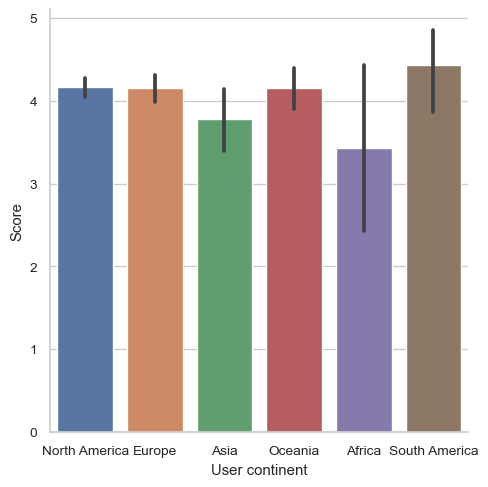

In [217]:
# Create a bar chart
sns.set(font_scale=.9)
sns.set_style("whitegrid")
sns.catplot(x = 'User continent', y = 'Score', data=reviews, kind= 'bar')
plt.show()

In [218]:
# Print the frequency counts for "User continent"
print(reviews['User continent'].value_counts())

North America    295
Europe           118
Oceania           41
Asia              36
Africa             7
South America      7
Name: User continent, dtype: int64


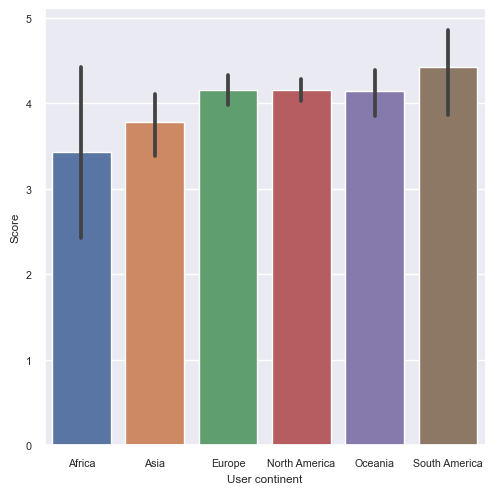

In [220]:
# Convert "User continent" to a categorical variable
reviews["User continent"] = reviews["User continent"].astype('category')
sns.set(font_scale = .7)
sns.catplot(x = 'User continent', y="Score", data=reviews, kind="bar")
plt.show()

In [222]:
continent_categories = list(reviews["User continent"].value_counts().index)
continent_categories

['North America', 'Europe', 'Oceania', 'Asia', 'Africa', 'South America']

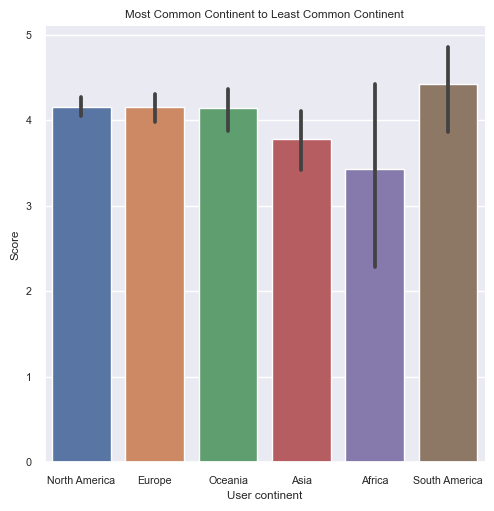

In [227]:
# Reorder "User continent" using continent_categories and rerun the graphic
continent_categories = list(reviews["User continent"].value_counts().index)
reviews["User continent"] = reviews["User continent"].cat.reorder_categories(new_categories=continent_categories)
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar")
plt.title('Most Common Continent to Least Common Continent')
plt.show()

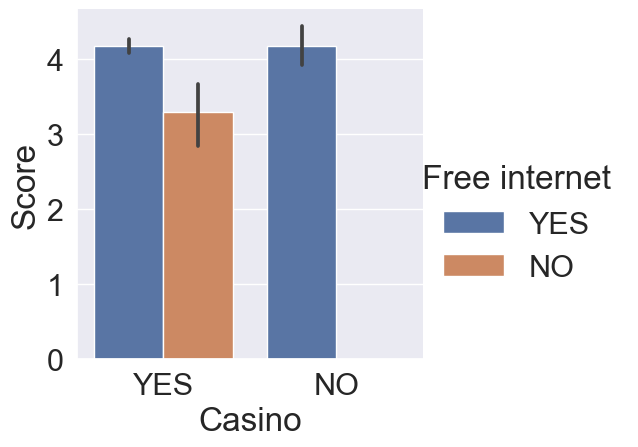

In [229]:
# Add a second category to split the data on: "Free internet"
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x = 'Casino', y="Score", data=reviews, kind="bar", hue = 'Free internet')
plt.show()

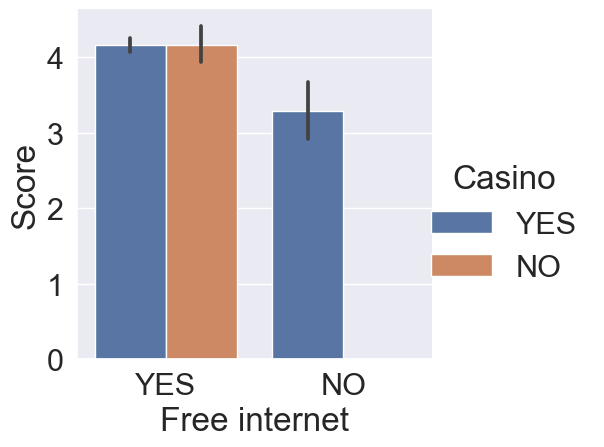

In [230]:
# Switch the x and hue categories
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x = 'Free internet', y="Score", data=reviews, kind="bar", hue= 'Casino')
plt.show()

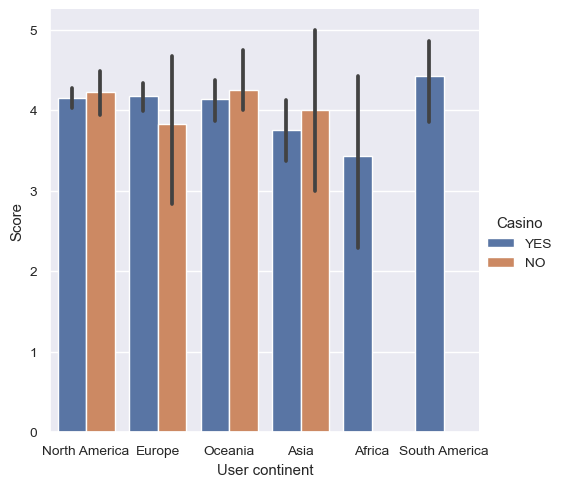

In [235]:
# Update x to be "User continent"
sns.set(font_scale = 0.90)
sns.set_style("darkgrid")
sns.catplot(x= 'User continent', y="Score", data=reviews, kind="bar", hue="Casino")
plt.show()

# Pointplot example

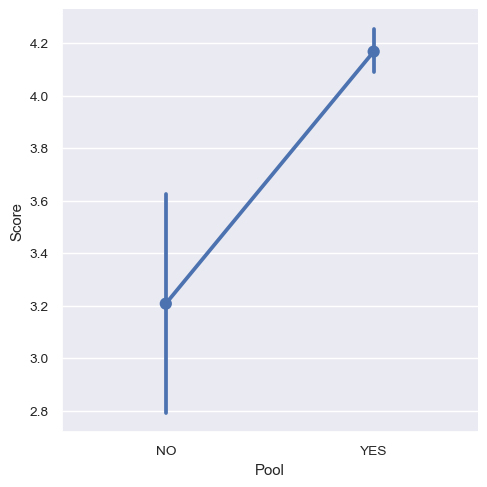

In [237]:
sns.set(font_scale = 0.90)
sns.set_style("darkgrid")
sns.catplot(x= 'Pool', y="Score", data=reviews, kind="point")
plt.show()

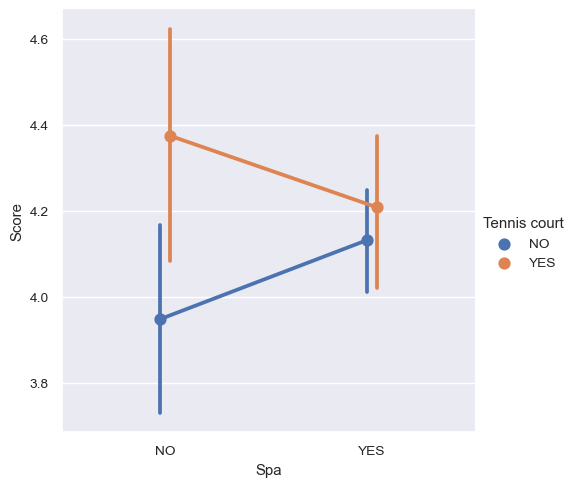

In [246]:
sns.catplot(x= 'Spa', y="Score", data=reviews, kind="point",
           hue = 'Tennis court', dodge = True)
plt.show()

Sometimes we might not want to join the estimators of each line. WE can set this off by passing join = False

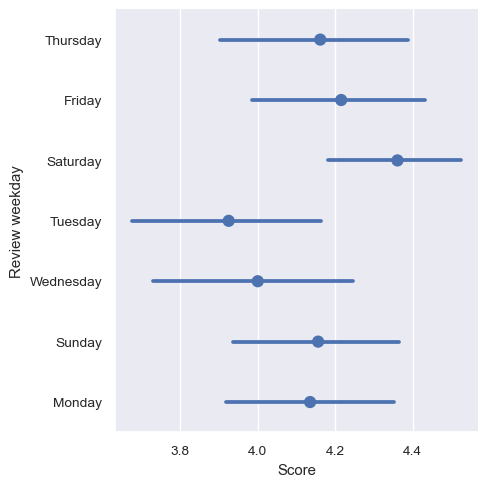

In [241]:
sns.catplot(x= 'Score', y= "Review weekday", data=reviews, kind="point",
           join = False)
plt.show()

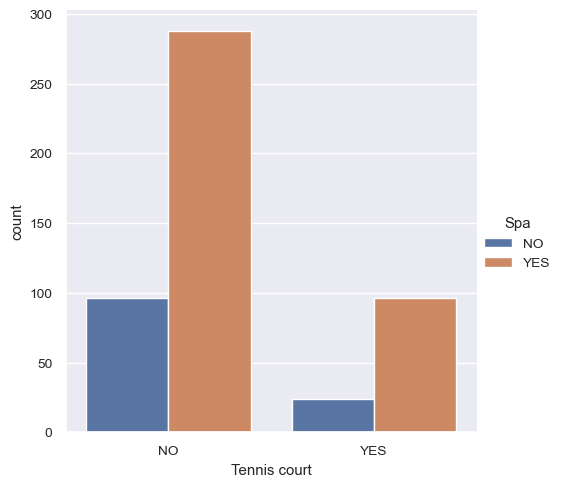

In [243]:
sns.catplot(data = reviews, x = 'Tennis court', kind = 'count', hue = 'Spa')
plt.show()

Creating helpful visualizations sometimes requires a lot of testing. You have been asked to create a visualization that shows the number of reviews, "Nr. reviews", which is the number of reviews a reviewer has previously written, across a hotel's star rating, "Hotel stars". Since the number of reviews is numerical, you have decided to use a point plot to show the mean of the data across the categories.

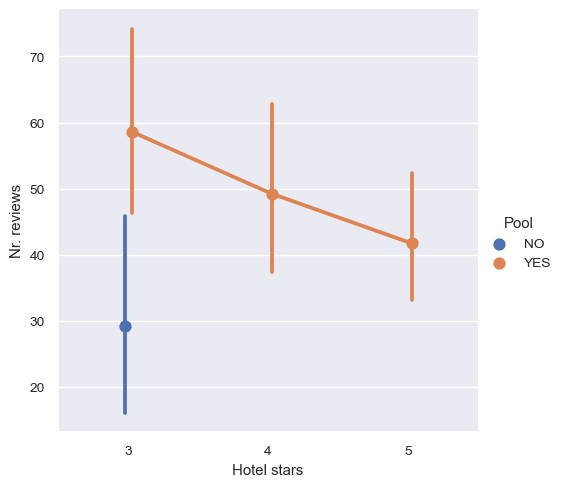

In [247]:
# Create a point plot with catplot using "Hotel stars" and "Nr. reviews"
sns.catplot(
  # Split the data across Hotel stars and summarize Nr. reviews
  x = 'Hotel stars',
  y = 'Nr. reviews',
  data=reviews,
  # Specify a point plot
  kind = 'point',
  hue="Pool",
  # Make sure the lines and points don't overlap
  dodge = True
)
plt.show()


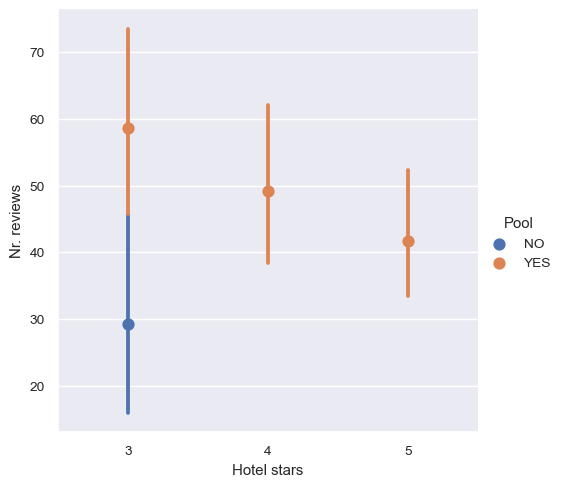

In [250]:
# Create a point plot with catplot using "Hotel stars" and "Nr. reviews"
sns.catplot(
  # Split the data across Hotel stars and summarize Nr. reviews
  x = 'Hotel stars',
  y = 'Nr. reviews',
  data=reviews,
  # Specify a point plot
  kind = 'point',
  hue="Pool",
  # Make sure the lines and points don't overlap
  join = False
)
plt.show()

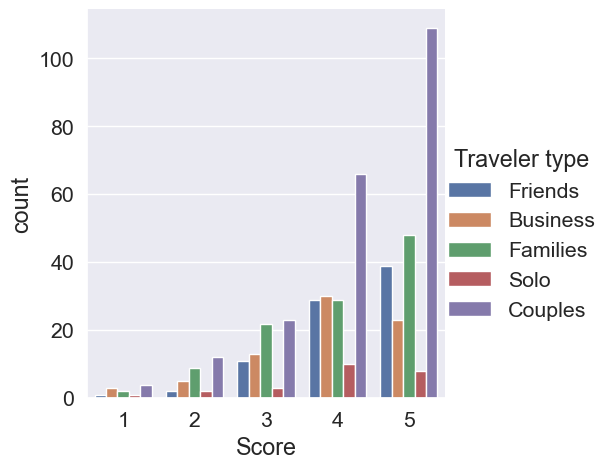

In [251]:
sns.set(font_scale=1.4)
sns.set_style("darkgrid")

# Create a catplot that will count the frequency of "Score" across "Traveler type"
sns.catplot(
  data = reviews, x = 'Score', kind = 'count', hue = 'Traveler type'
)
plt.show()

The couples Traveler type and a score of 5 were the most common values found in the data

# Facetgird

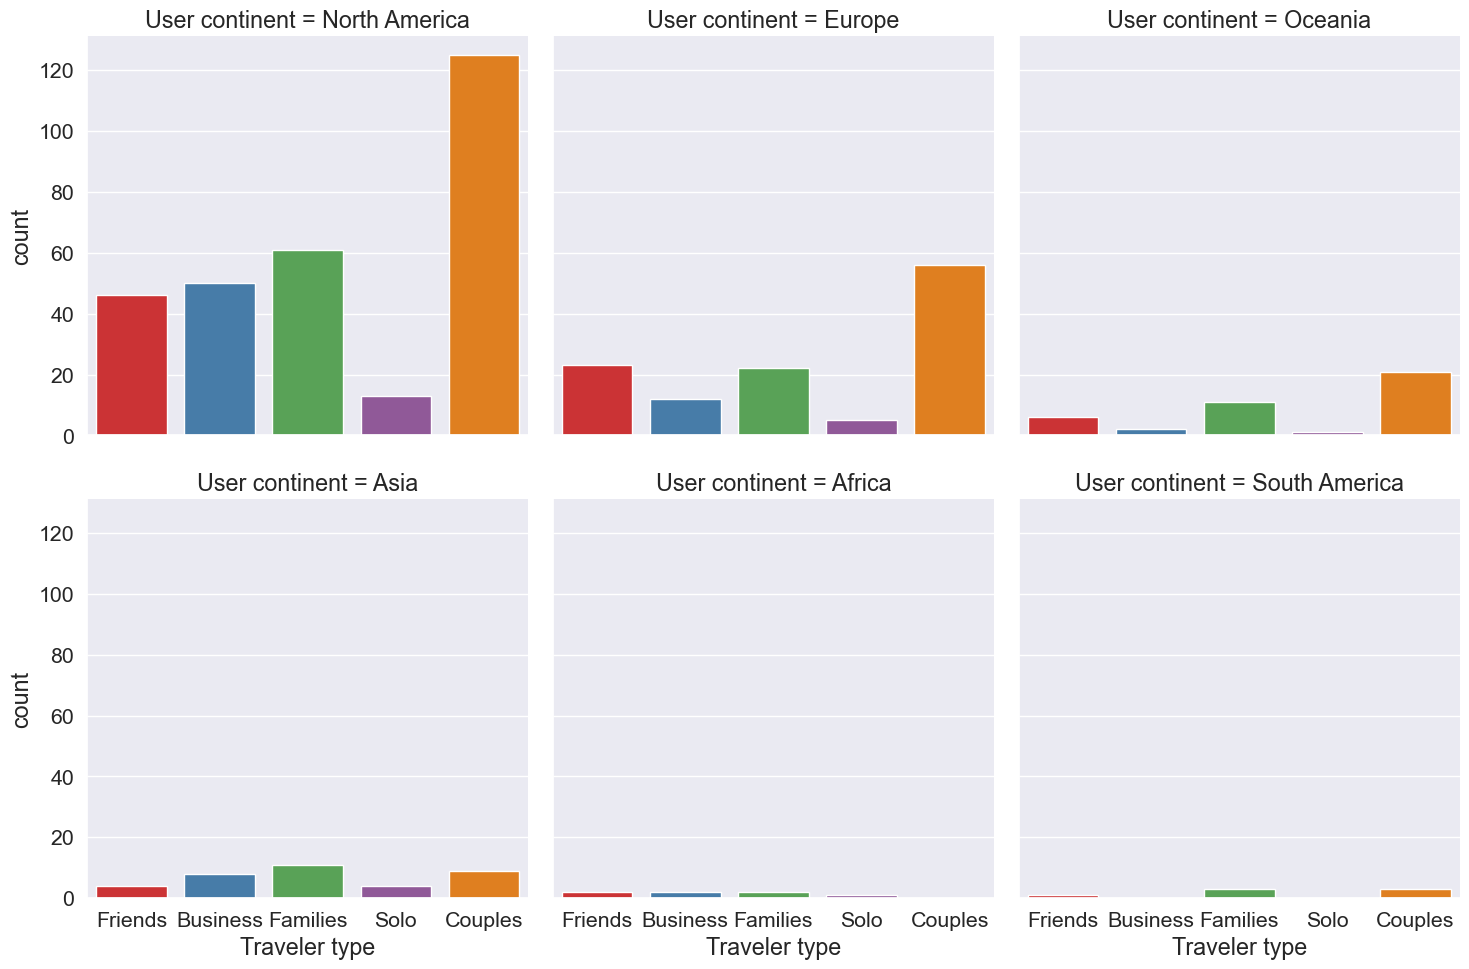

In [255]:
sns.catplot(x = 'Traveler type', kind = 'count', col = 'User continent', col_wrap = 3,
           palette = sns.color_palette('Set1'), data = reviews)
plt.show()

Updating the plot

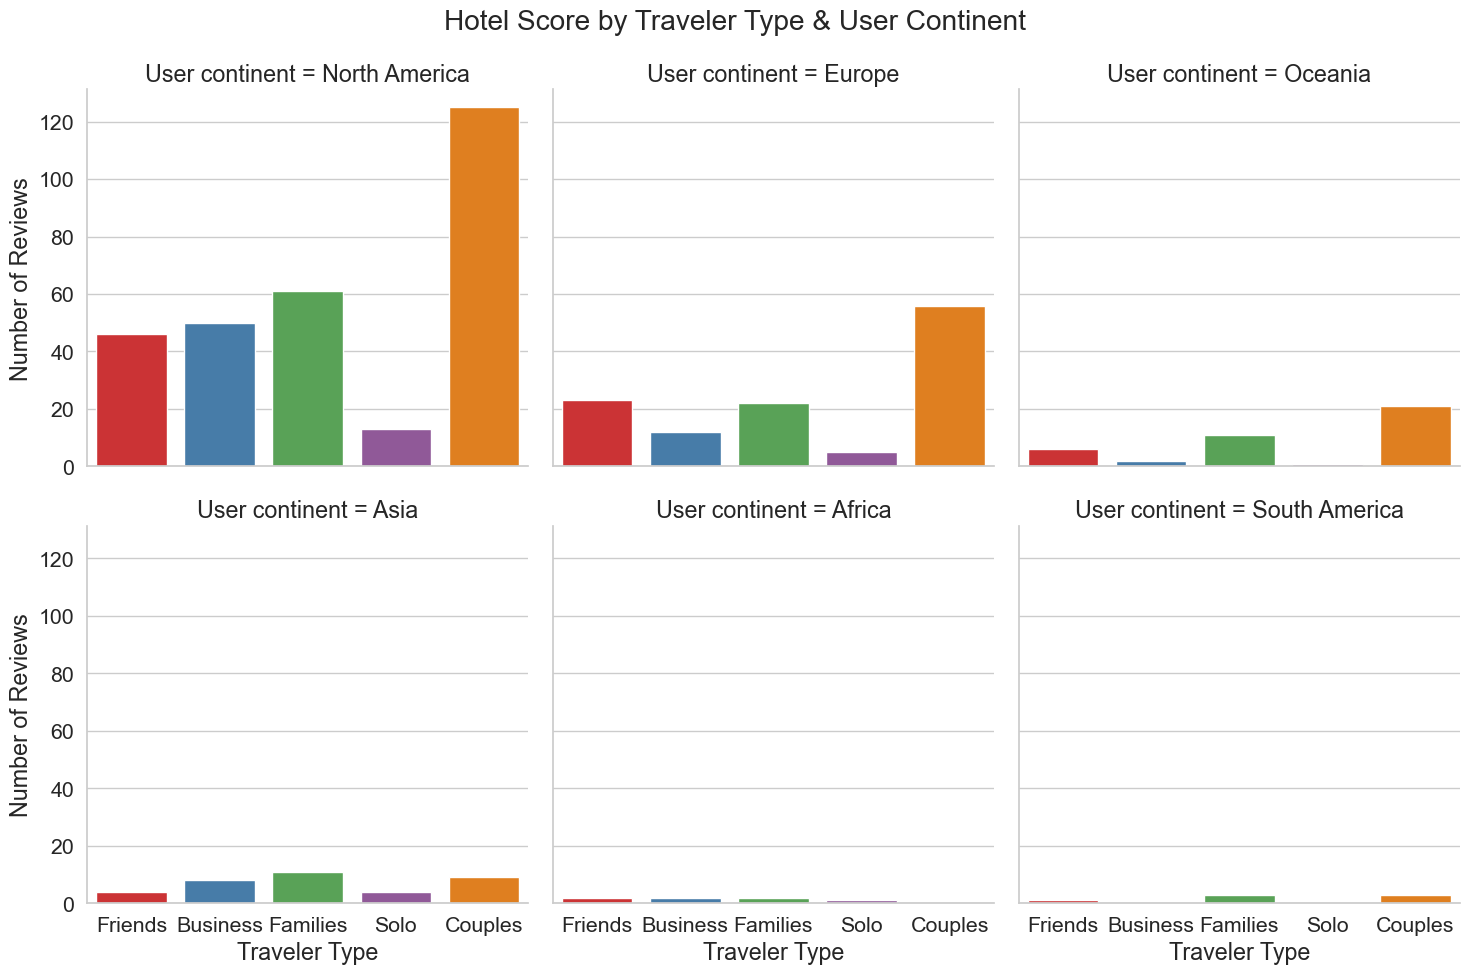

In [257]:
sns.set_style('whitegrid')
ax = sns.catplot(x = 'Traveler type', kind = 'count', col = 'User continent', col_wrap = 3,
           palette = sns.color_palette('Set1'), data = reviews)
ax.fig.suptitle('Hotel Score by Traveler Type & User Continent')
ax.set_axis_labels('Traveler Type', 'Number of Reviews')
plt.subplots_adjust(top = 0.9)
plt.show()

In [258]:
reviews.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


The number of reviews of hotels by "Period of stay" and by the day of the week, "Review weekday". The goal of this visualization is to see what day of the week has the most reviews for each of the four periods of stay.

In [259]:
reviews['Period of stay'].value_counts(dropna = False)

Mar-May    128
Jun-Aug    126
Sep-Nov    126
Dec-Feb    124
Name: Period of stay, dtype: int64

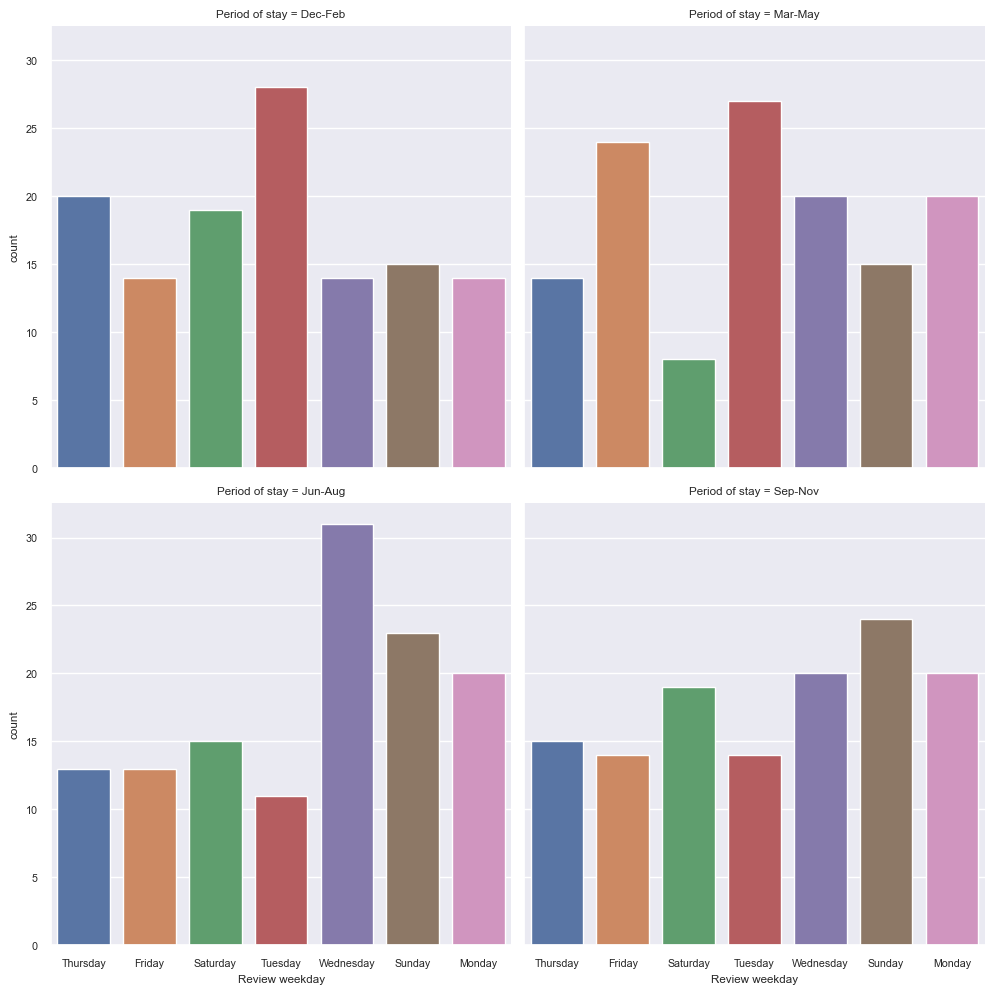

In [261]:
# Create a catplot for each "Period of stay" broken down by "Review weekday"
sns.set(font_scale = 0.7)
ax = sns.catplot(
  # Make sure Review weekday is along the x-axis
  x = 'Review weekday',
  # Specify Period of stay as the column to create individual graphics for
  col = 'Period of stay',
  # Specify that a count plot should be created
  kind = 'count',
  # Wrap the plots after every 2nd graphic.
  col_wrap = 2,
  data=reviews
)
plt.show()

Tuesday is the most common review day from Dec through May. But, one of the least common review day from Jun to Nov.

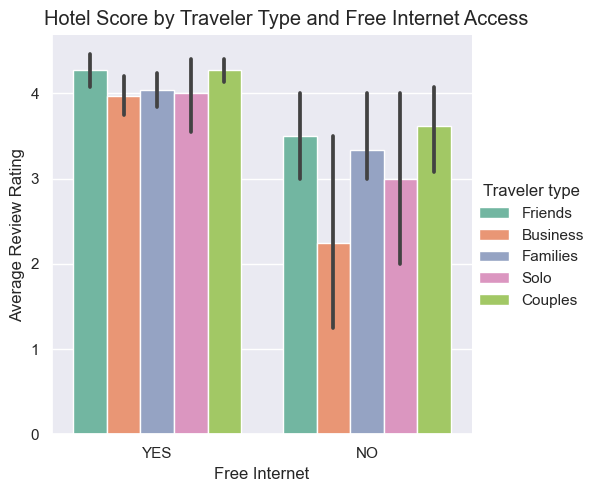

In [263]:
# Adjust the color
sns.set(font_scale = 1.0)
ax = sns.catplot(
  x="Free internet", y="Score",
  hue="Traveler type", kind="bar",
  data=reviews,
  palette=sns.color_palette("Set2")
)

# Add a title
ax.fig.suptitle("Hotel Score by Traveler Type and Free Internet Access")
# Update the axis labels
ax.set_axis_labels("Free Internet", "Average Review Rating")

# Adjust the starting height of the graphic
plt.subplots_adjust(top=0.93)
plt.show()

It looks like free internet really makes a difference, especially for business-related travelers. It is important to create plots that highlight the results you are trying to convey.

# Categorical pitfalls

used_cars = pd.read_csv('/Users/mishudhar/Downloads/Categorcal_Python/cars.csv')

Check and Convert

In [271]:
used_cars['color'].dtype

dtype('O')

In [274]:
used_cars

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [275]:
used_cars['color'] = used['cars'].astype('category')

NameError: name 'used' is not defined

In [276]:
cars = pd.read_csv('/Users/mishudhar/Downloads/Categorcal_Python/cars.csv')

In [277]:
cars['color'] = cars['color'].astype('category')

In [278]:
cars['color'] = cars['color'].str.upper()

In [279]:
cars['color'].dtype

dtype('O')

# Note that- whenever we make some changes into categorical data it converts to objects automatically.

In [280]:
cars['color'].value_counts(dropna = False)

BLACK     7705
SILVER    6852
BLUE      5802
WHITE     4212
GREY      3751
RED       2925
GREEN     2760
OTHER     2688
BROWN      886
VIOLET     463
YELLOW     303
ORANGE     184
Name: color, dtype: int64

In [282]:
cars['number_of_photos'].dtype

dtype('int64')

Using Numpy Array
Numpy functions such as Sum(), mean( ) etc provides error for categorical data.


In [ ]:
# However we can convert it into int and perform mthe operations
# cars['number_of_photos'].astype('int').sum()



In [283]:
# Print the frequency table of body_type and include NaN values
print(used_cars['body_type'].value_counts(dropna = False))


sedan        13011
hatchback     7644
universal     5507
suv           5164
minivan       3608
minibus       1369
van            808
coupe          652
liftback       552
pickup         129
cabriolet       75
limousine       12
Name: body_type, dtype: int64


In [284]:
# # Update NaN values
# used_cars.loc[used_cars["body_type"].isna(), "body_type"] = "other

In [286]:
# Print the frequency table of Sale Rating
print(cars["Sale Rating"].value_counts())

KeyError: 'Sale Rating'

In [288]:
list(cars.columns)

['manufacturer_name',
 'model_name',
 'transmission',
 'color',
 'odometer_value',
 'year_produced',
 'engine_fuel',
 'engine_has_gas',
 'engine_type',
 'engine_capacity',
 'body_type',
 'has_warranty',
 'state',
 'drivetrain',
 'price_usd',
 'is_exchangeable',
 'location_region',
 'number_of_photos',
 'up_counter',
 'feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'duration_listed']

# Label encoding


In [290]:
cars['manufacturer_name'].dtype

dtype('O')

In [292]:
# Code that will contain the numerical values of the labels
cars['manufacturer_name'] = cars['manufacturer_name'].astype('category')

In [296]:
cars['manufacturer_code'] = cars['manufacturer_name'].cat.codes
cars[['manufacturer_code', 'manufacturer_name']]

,manufacturer_code,manufacturer_name
0,45,Subaru
1,45,Subaru
2,45,Subaru
3,45,Subaru
4,45,Subaru
...,...,...
38526,8,Chrysler
38527,8,Chrysler
38528,8,Chrysler
38529,8,Chrysler


# Creating a codebook


In [298]:
codes = cars['manufacturer_name'].cat.codes
categories = cars['manufacturer_name']
name_map = dict(zip(codes, categories))
name_map

{45: 'Subaru',
 24: 'LADA',
 12: 'Dodge',
 54: 'УАЗ',
 23: 'Kia',
 35: 'Opel',
 53: 'Москвич',
 1: 'Alfa Romeo',
 0: 'Acura',
 10: 'Dacia',
 27: 'Lexus',
 33: 'Mitsubishi',
 25: 'Lancia',
 9: 'Citroen',
 32: 'Mini',
 21: 'Jaguar',
 38: 'Porsche',
 44: 'SsangYong',
 11: 'Daewoo',
 15: 'Geely',
 50: 'ВАЗ',
 13: 'Fiat',
 14: 'Ford',
 39: 'Renault',
 42: 'Seat',
 40: 'Rover',
 48: 'Volkswagen',
 28: 'Lifan',
 22: 'Jeep',
 5: 'Cadillac',
 2: 'Audi',
 52: 'ЗАЗ',
 47: 'Toyota',
 51: 'ГАЗ',
 49: 'Volvo',
 7: 'Chevrolet',
 16: 'Great Wall',
 4: 'Buick',
 37: 'Pontiac',
 29: 'Lincoln',
 18: 'Hyundai',
 34: 'Nissan',
 46: 'Suzuki',
 3: 'BMW',
 30: 'Mazda',
 26: 'Land Rover',
 20: 'Iveco',
 43: 'Skoda',
 41: 'Saab',
 19: 'Infiniti',
 6: 'Chery',
 17: 'Honda',
 31: 'Mercedes-Benz',
 36: 'Peugeot',
 8: 'Chrysler'}

In [299]:
# creating the code
cars['manufacturer_code'] = cars['manufacturer_name'].cat.codes

# Reverting to previous values
cars['manufacturer_code'].map(name_map)

0          Subaru
1          Subaru
2          Subaru
3          Subaru
4          Subaru
           ...   
38526    Chrysler
38527    Chrysler
38528    Chrysler
38529    Chrysler
38530    Chrysler
Name: manufacturer_code, Length: 38531, dtype: object

# Boolean Coding
When creating a label encoding for a categorical columns, it is common to create a Boolean code that represents a group of categories.

In [300]:
# For example: we wanted to create a boolean code for all cars that were vans.
cars['body_type'].str.contains('vans', regex = False)

0        False
1        False
2        False
3        False
4        False
         ...  
38526    False
38527    False
38528    False
38529    False
38530    False
Name: body_type, Length: 38531, dtype: bool

Creating aboolean coding

In [304]:
cars['van_coding'] = np.where(cars['body_type'].str.contains('van', regex = False), 1, 0)

This code above ommands whenever it will see a van it will be 1 or for any other type it will be 0

In [305]:
cars['van_coding'].value_counts()

0    34115
1     4416
Name: van_coding, dtype: int64

In [306]:
cars['color']

0        SILVER
1          BLUE
2           RED
3          BLUE
4         BLACK
          ...  
38526    SILVER
38527      BLUE
38528      BLUE
38529     BLACK
38530    SILVER
Name: color, Length: 38531, dtype: object

In [307]:
used_cars["color"] = used_cars['color'].astype('category')
print(used_cars["color"].value_counts())

black     7705
silver    6852
blue      5802
white     4212
grey      3751
red       2925
green     2760
other     2688
brown      886
violet     463
yellow     303
orange     184
Name: color, dtype: int64


In [310]:
# Create a label encoding
cars["color_code"] = used_cars['color'].cat.codes

In [312]:
# Create codes and categories objects
codes = cars['color_code']
categories = cars["color"]
color_map = dict(zip(codes, categories))
color_map

{8: 'SILVER',
 1: 'BLUE',
 7: 'RED',
 0: 'BLACK',
 4: 'GREY',
 6: 'OTHER',
 2: 'BROWN',
 10: 'WHITE',
 3: 'GREEN',
 9: 'VIOLET',
 5: 'ORANGE',
 11: 'YELLOW'}

WE successfully created a label encoding for the color column. Creating an encoding like this can save on memory and improve performance. Reading and writing files that use codes instead of strings can save a lot of time.

In [313]:
cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,manufacturer_code,van_coding,color_code
0,Subaru,Outback,automatic,SILVER,190000,2010,gasoline,False,gasoline,2.5,...,False,True,False,True,True,True,16,45,0,8
1,Subaru,Outback,automatic,BLUE,290000,2002,gasoline,False,gasoline,3.0,...,True,True,False,False,False,True,83,45,0,1
2,Subaru,Forester,automatic,RED,402000,2001,gasoline,False,gasoline,2.5,...,False,False,False,False,True,True,151,45,0,7
3,Subaru,Impreza,mechanical,BLUE,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,86,45,0,1
4,Subaru,Legacy,automatic,BLACK,280000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,True,7,45,0,0


In [315]:
cars_sub = cars.sample(n =100)
cars_sub.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,manufacturer_code,van_coding,color_code
26588,Nissan,Juke,mechanical,SILVER,130000,2011,gasoline,False,gasoline,1.6,...,False,True,False,True,True,True,77,34,0,8
22225,Toyota,Camry,automatic,OTHER,315431,2004,gasoline,False,gasoline,2.4,...,True,True,False,False,True,False,4,47,0,6
11720,Ford,Fusion,automatic,BLUE,144000,2014,gasoline,False,gasoline,1.5,...,False,False,True,True,True,True,224,14,0,1
11038,Ford,Fusion,mechanical,BLUE,247000,2007,diesel,False,diesel,1.4,...,False,False,False,False,False,True,113,14,0,1
6804,Citroen,Xantia,mechanical,GREEN,290000,1999,gasoline,False,gasoline,1.8,...,False,True,False,False,False,False,42,9,0,3


In [316]:
# Print the manufacturer name frequency table
print(cars['manufacturer_name'].value_counts())

Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery     

In [317]:
# Create a Boolean column based on if the manufacturer name that contain Volkswagen
cars["is_volkswagen"] = np.where(cars["manufacturer_name"].str.contains('Volkswagen', regex=False), True, False
)

In [319]:
# update the code
# Create a Boolean column for the most common manufacturer name
cars["is_volkswagen"] = np.where(cars["manufacturer_name"].str.contains("Volkswagen", regex=False), 1, 0
)
  
# Check the final frequency table
print(cars['manufacturer_name'].value_counts())

Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery     

In [320]:
# Check the final frequency table
print(cars['is_volkswagen'].value_counts())

0    34288
1     4243
Name: is_volkswagen, dtype: int64
